# Banker's Algorithm and Visualization

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.table import Table

# --------------------------
# 1. Banker's Safety Algorithm
# --------------------------
def is_safe(available, allocation, need, n_processes):
    """
    Checks if the system is in a safe state.
    Returns True and the safe sequence if so.
    """
    work = available.copy()
    finish = [False] * n_processes
    safe_sequence = []
    available_log = [work.copy()]  # to track available after each process completes
    blocked_processes= []
    
    while len(safe_sequence) < n_processes:
        allocated_in_this_round = False
        for i in range(n_processes):
            if not finish[i] and np.all(need[i] <= work):
                work += allocation[i]    # process releases its resources
                finish[i] = True
                safe_sequence.append(i)
                available_log.append(work.copy())  # log new available pool
                allocated_in_this_round = True
        if not allocated_in_this_round:
            # Detect blocked processes that are waiting for resources
            print(f"Processes that finished: {', '.join([f'P{i}' for i in safe_sequence])}")
            print(f"Current available resources: {work}")
            for i in range(n_processes):
                if not finish[i] and any(need[i] > work):
                    blocked_processes.append(f"P{i}")
            return False, blocked_processes, []
    return True, safe_sequence, available_log
    
# --------------------------
# 2. Visualization functions
# --------------------------

def visualize_safe_sequence(sequence):
    """
    Visualizes the safe sequence as a horizontal block diagram with arrows.
    """
    fig, ax = plt.subplots(figsize=(10, 2))
    
    x_positions = np.arange(len(sequence)) * 2  # spacing
    
    # Draw process blocks
    for i, proc in enumerate(sequence):
        rect = plt.Rectangle((x_positions[i], 0), 1.5, 0.8,
                             facecolor='skyblue', edgecolor='black', linewidth=1.5)
        ax.add_patch(rect)
        ax.text(x_positions[i] + 0.75, 0.4, f"P{proc}",
                fontsize=14, ha='center', va='center', color='black')

        # Draw arrows except for the last block
        if i < len(sequence) - 1:
            ax.annotate("",
                        xy=(x_positions[i+1], 0.4),       # arrow points to next block
                        xytext=(x_positions[i] + 1.5, 0.4),  # arrow starts at current block's right edge
                        arrowprops=dict(arrowstyle="->", lw=2))
    
    ax.set_xlim(-0.5, x_positions[-1] + 2)
    ax.set_ylim(-0.2, 1)
    ax.axis('off')
    ax.set_title("Safe Sequence Visualization", fontsize=16)
    plt.tight_layout()
    plt.show()


def visualize_matrices(maximum, allocation, need, processes):
    n_processes = len(processes)

    fig, ax = plt.subplots(figsize=(8, n_processes * 0.5 + 1))
    ax.axis('tight')
    ax.axis('off')

    # Table header
    col_labels = ['Process', 'Maximum', 'Allocation', 'Need']

    col_widths = [0.15, 0.25, 0.25, 0.25]

    # Table content
    table_data = []
    for i in range(n_processes):
        max_str = ' '.join(str(maximum[i, j]) for j in range(maximum.shape[1]))
        alloc_str = ' '.join(str(allocation[i, j]) for j in range(allocation.shape[1]))
        need_str = ' '.join(str(need[i, j]) for j in range(need.shape[1]))
        row = [processes[i], max_str, alloc_str, need_str]
        table_data.append(row)

    # Add table to the plot
    table = Table(ax, bbox=[0, 0, 1, 1])

    # Add header cells
    for col, (label, width) in enumerate(zip(col_labels, col_widths)):
        table.add_cell(0, col, width, 0.5, text=label, loc='center', facecolor='#d9d9d9')

    # Add data cells
    for row_idx, row_data in enumerate(table_data):
        for col_idx, cell_value in enumerate(row_data):
            table.add_cell(row_idx+1, col_idx, col_widths[col_idx], 0.4, 
                           text=str(cell_value), loc='center')

    table.auto_set_font_size(False)
    table.set_fontsize(12)
    ax.add_table(table)

    ax.set_title("Resource Allocation Table", fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()


def visualize_available_log(available_log, sequence):
    """
    Displays the available resource pool after each process completes as a table.
    """
    fig, ax = plt.subplots(figsize=(7, len(available_log)*0.5 + 1))
    ax.set_axis_off()
    table = Table(ax, bbox=[0, 0, 1, 1])

    n_resources = len(available_log[0])
    n_rows = len(available_log)

    col_labels = ["State"] + [f"R{j}" for j in range(n_resources)]
    col_widths = [0.2] + [0.2] * n_resources

    # Add header
    for col, (label, width) in enumerate(zip(col_labels, col_widths)):
        table.add_cell(0, col, width, 0.4, text=label, loc='center', facecolor='lightgrey')

    # Add data rows
    for i, pool in enumerate(available_log):
        state_label = f"Start" if i == 0 else f"After P{sequence[i-1]}"
        table.add_cell(i+1, 0, col_widths[0], 0.4, text=state_label, loc='center')
        for j in range(n_resources):
            table.add_cell(i+1, j+1, col_widths[j+1], 0.4, text=str(pool[j]), loc='center')

    # Set table position
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    ax.add_table(table)

    ax.set_title("Available Resource Pool After Each Process Completes", fontsize=14, pad=20)
    plt.tight_layout()
    plt.show()

## Safe System

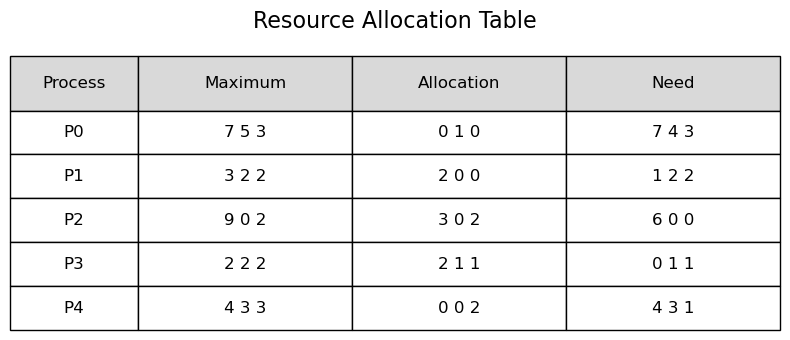

System is in a SAFE state.


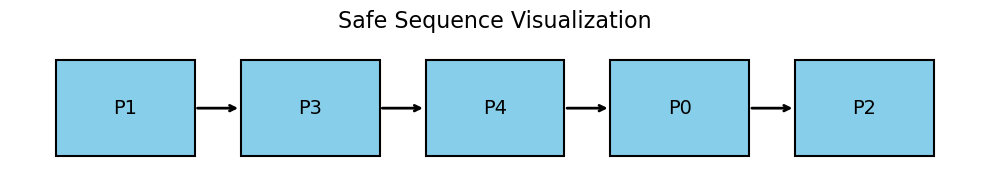

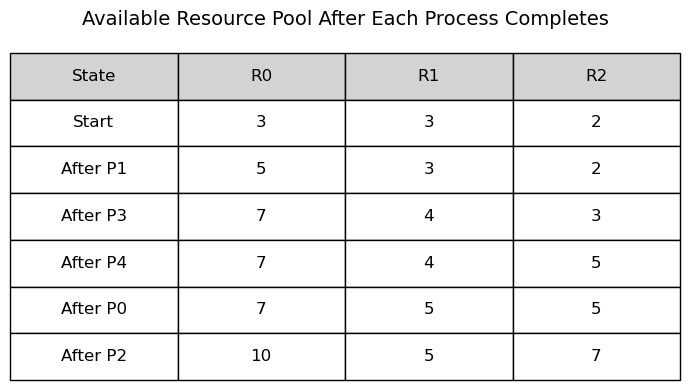

In [11]:
# Number of processes and resource types
n_processes = 5
n_resources = 3

# Available resources
available = np.array([3, 3, 2])

# Maximum demand for each process
maximum = np.array([
    [7, 5, 3],
    [3, 2, 2],
    [9, 0, 2],
    [2, 2, 2],
    [4, 3, 3]
])

# Current allocation for each process
allocation = np.array([
    [0, 1, 0],
    [2, 0, 0],
    [3, 0, 2],
    [2, 1, 1],
    [0, 0, 2]
])

# Need matrix: Maximum - Allocation
need = maximum - allocation

# Check for system safety and visualize
safe, sequence, available_log = is_safe(available, allocation, need, n_processes)

# Visualize maximum, allocation, and need matrices
processes = [f"P{i}" for i in range(n_processes)]
visualize_matrices(maximum, allocation, need, processes)

if safe:
    print("System is in a SAFE state.")
    visualize_safe_sequence(sequence)
    visualize_available_log(available_log, sequence)
else:
    print("\nSystem 1 is NOT in a safe state. Deadlock possible.")
    blocked_processes = sequence
    print(f"Blocked processes causing deadlock: {', '.join(blocked_processes)}")  # Display processes causing deadlock

# Deadlock Recovery - Resource Preemption Technique

In [12]:
def resource_preemption(available, allocation, need, maximum, blocked_processes):
    """
    Attempts to recover from deadlock by preempting resources from blocked processes.
    Returns safe flag, sequence, and available log if recovery is successful.
    """
    n_processes, n_resources = allocation.shape
    processes = [f"P{i}" for i in range(n_processes)]

    tried = set()  # keep track of which blocked processes were tried

    for proc in blocked_processes:
        blocked_index = int(proc[1:])
        if blocked_index in tried:
            continue  # avoid retrying the same process

        tried.add(blocked_index)
        print('-'*50)
        print(f"Preempting resources from blocked process {proc}")

        # Preempt resources
        available += allocation[blocked_index]
        allocation[blocked_index] = np.zeros(n_resources)
        need = maximum - allocation

        visualize_matrices(maximum, allocation, need, processes)

        # Check if the system is now safe
        safe, new_sequence, new_available_log = is_safe(available, allocation, need, n_processes)
        if safe:
            print(f"After preempting originally allocated resources from {', '.join([f'P{i}' for i in tried])}")
            return safe, new_sequence, new_available_log

    print("Unable to recover from deadlock after trying all blocked processes.")
    return False, [], []


## Unsafe System & Recovery applied

Processes that finished: P4
Current available resources: [4 4 2]


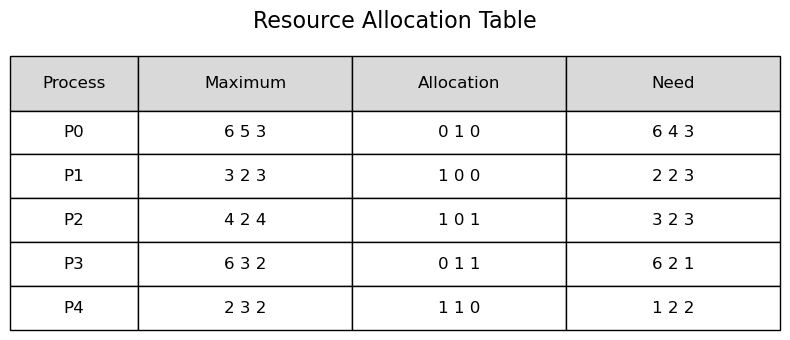


System 2 is NOT in a safe state. Deadlock possible.
Blocked processes causing deadlock: P0, P1, P2, P3
--------------------------------------------------
Preempting resources from blocked process P0


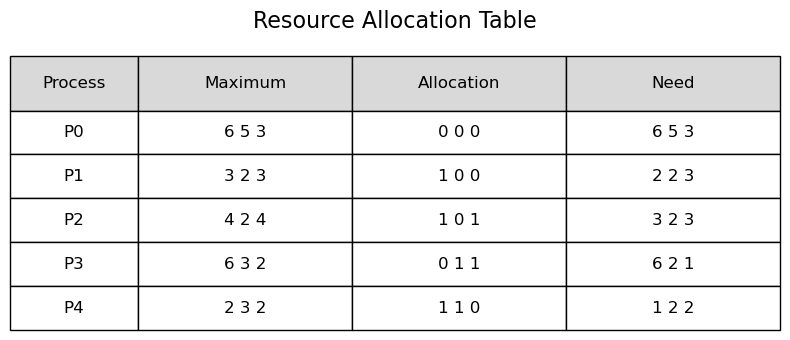

Processes that finished: P4
Current available resources: [4 5 2]
--------------------------------------------------
Preempting resources from blocked process P1


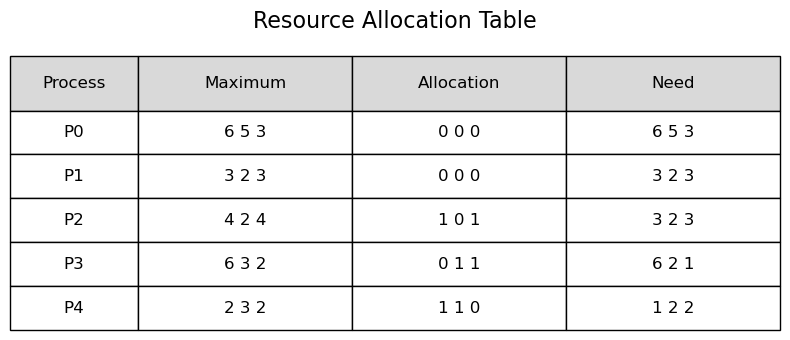

Processes that finished: P4
Current available resources: [5 5 2]
--------------------------------------------------
Preempting resources from blocked process P2


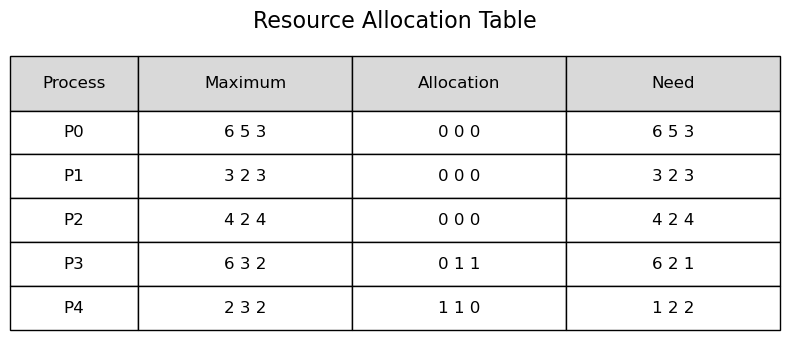

After preempting originally allocated resources from P0, P1, P2
System has been recovered to a safe state.


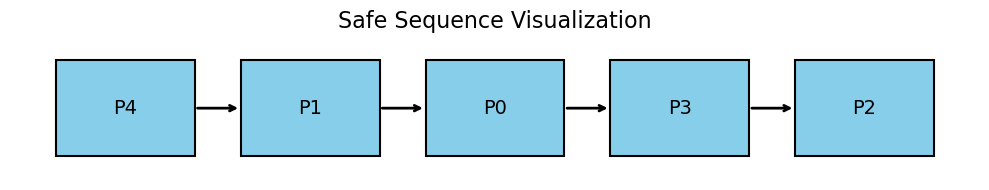

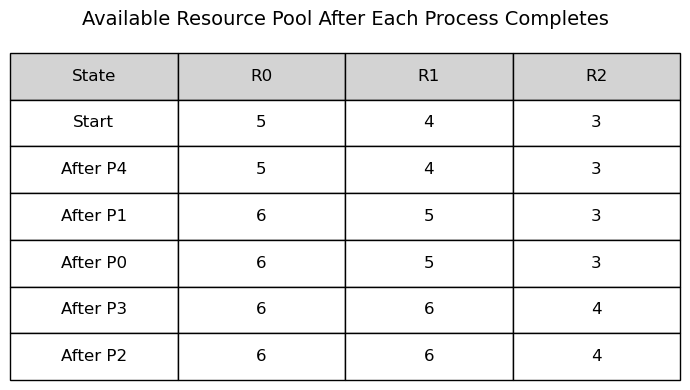

In [13]:
# Number of processes and resource types
n_processes = 5
n_resources = 3

# Available resources
available = np.array([3, 3, 2])

# Maximum demand for each process
maximum = np.array([
    [6, 5, 3],
    [3, 2, 3],
    [4, 2, 4],
    [6, 3, 2],
    [2, 3, 2]
])

# Current allocation for each process
allocation = np.array([
    [0, 1, 0],
    [1, 0, 0],
    [1, 0, 1],
    [0, 1, 1],
    [1, 1, 0]
])

# Need matrix: Maximum - Allocation
need = maximum - allocation

# Check for system safety and visualize
safe, sequence, available_log = is_safe(available, allocation, need, n_processes)

# Visualize maximum, allocation, and need matrices
processes = [f"P{i}" for i in range(n_processes)]
visualize_matrices(maximum, allocation, need, processes)

if safe:
    print("System 2 is in a SAFE state.")
    visualize_safe_sequence(sequence)
    visualize_available_log(available_log, sequence)
else:
    print("\nSystem 2 is NOT in a safe state. Deadlock possible.")
    
    # Attempt recovery
    finished_before_deadlock = [i for i in range(n_processes) if f'P{i}' not in sequence]
    blocked_processes = [f'P{i}' for i in range(n_processes) if f'P{i}' in sequence]

    print(f"Blocked processes causing deadlock: {', '.join(blocked_processes)}")

    safe, recovered_sequence, recovered_log = resource_preemption(available.copy(), allocation.copy(), need.copy(), maximum.copy(), blocked_processes.copy())

    if safe:
        print("System has been recovered to a safe state.")
        final_sequence = finished_before_deadlock + [p for p in recovered_sequence if p not in finished_before_deadlock]
        visualize_safe_sequence(final_sequence)
        visualize_available_log(recovered_log, final_sequence)
    else:
        print("Deadlock recovery failed.")
